In [54]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("samuelcortinhas/apples-or-tomatoes-image-classification")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/apples-or-tomatoes-image-classification


In [55]:
pip install tensorflow --upgrade


Note: you may need to restart the kernel to use updated packages.


In [57]:
# Correct import for VGG16
from tensorflow.keras.applications import VGG16

In [58]:
model = VGG16()

In [59]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

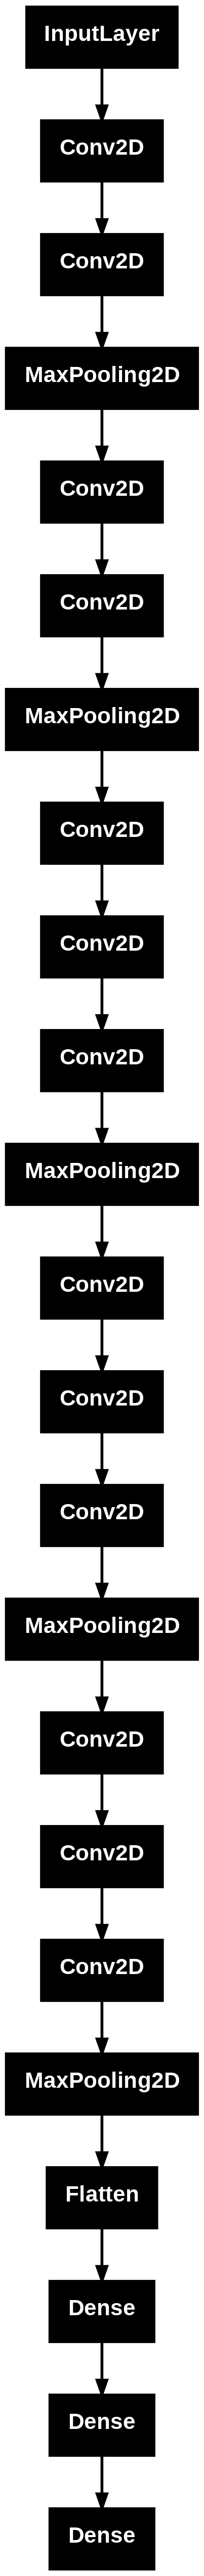

In [60]:
from keras.utils import plot_model
plot_model(model)

In [61]:
model.layers

[<InputLayer name=input_layer_3, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <MaxPooling2D name=block1_pool, built=True>,
 <Conv2D name=block2_conv1, built=True>,
 <Conv2D name=block2_conv2, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <Conv2D name=block3_conv1, built=True>,
 <Conv2D name=block3_conv2, built=True>,
 <Conv2D name=block3_conv3, built=True>,
 <MaxPooling2D name=block3_pool, built=True>,
 <Conv2D name=block4_conv1, built=True>,
 <Conv2D name=block4_conv2, built=True>,
 <Conv2D name=block4_conv3, built=True>,
 <MaxPooling2D name=block4_pool, built=True>,
 <Conv2D name=block5_conv1, built=True>,
 <Conv2D name=block5_conv2, built=True>,
 <Conv2D name=block5_conv3, built=True>,
 <MaxPooling2D name=block5_pool, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=fc1, built=True>,
 <Dense name=fc2, built=True>,
 <Dense name=predictions, built=True>]

In [62]:
for i in range(len(model.layers)):
    # check for convolutional layer
    if 'conv' not in model.layers[i].name:
        continue

    # get filter weights
    filters, biases = model.layers[i].get_weights()
    print("layer number", i, model.layers[i].name, filters.shape)

array([[[[0.8601116 , 0.6161919 , 0.55114007, ..., 0.4212452 ,
          0.4828852 , 0.5304859 ],
         [0.9545779 , 0.5408773 , 0.6017826 , ..., 0.4582953 ,
          0.4846108 , 0.5538601 ],
         [0.89960235, 0.3896376 , 0.5539096 , ..., 0.42523453,
          0.4852669 , 0.5518304 ]],

        [[0.81635594, 0.65118545, 0.52590066, ..., 0.4087713 ,
          0.340725  , 0.47531587],
         [0.8683965 , 0.5615535 , 0.5647105 , ..., 0.44733417,
          0.2931476 , 0.46953422],
         [0.8437643 , 0.39145148, 0.5206881 , ..., 0.42896524,
          0.30857468, 0.4940327 ]],

        [[0.47662497, 0.63058364, 0.43417358, ..., 0.4150598 ,
          0.22949417, 0.28977698],
         [0.4609779 , 0.5572666 , 0.4450579 , ..., 0.4508793 ,
          0.12949093, 0.22478487],
         [0.4736674 , 0.40397066, 0.41671643, ..., 0.42346177,
          0.16341406, 0.27143562]]],


       [[[0.7392438 , 0.6404719 , 0.6507926 , ..., 0.43525034,
          0.810127  , 0.7901605 ],
         [0.

In [64]:
    filters, bias = model.layers[1].get_weights()

In [65]:
filters.shape

(3, 3, 3, 64)

In [66]:
bias.shape

(64,)

In [67]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min() , filters.max()
filters = (filters-f_min) / (f_max-f_min)


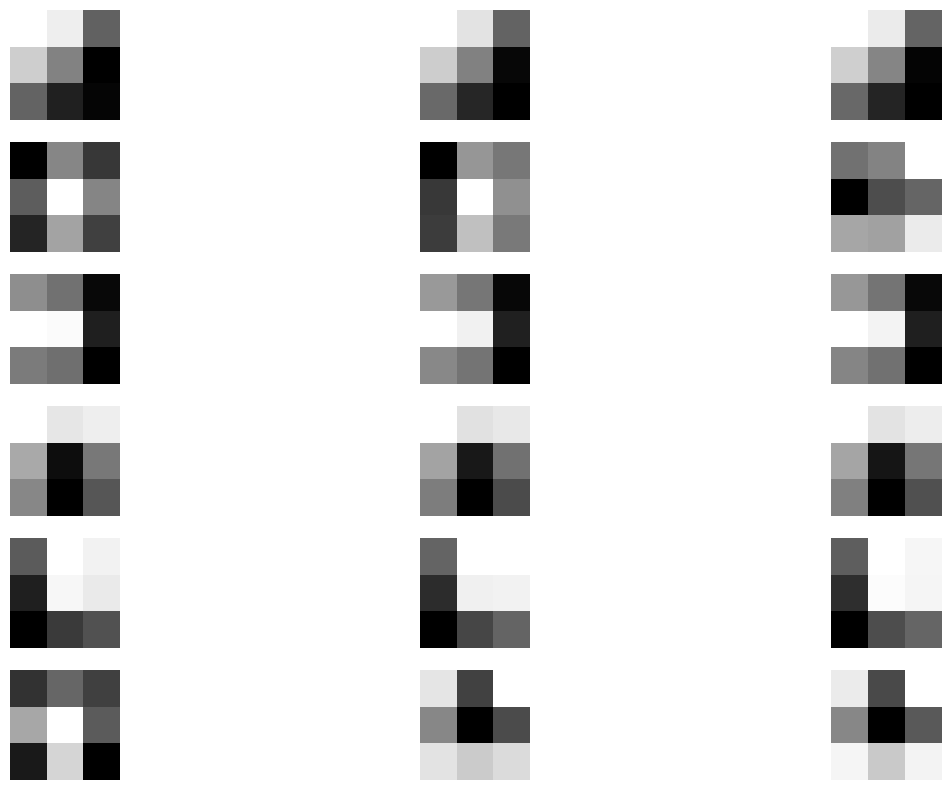

In [68]:
import matplotlib.pyplot as plt

# Number of filters to display
n_filters = 6
ix = 1

# Create a figure
plt.figure(figsize=(15, 10))

# Loop through the first n_filters
for i in range(n_filters):
    # Get the i-th filter (assuming 'filters' is a 4D array: height, width, channels, num_filters)
    f = filters[:, :, :, i]
    
    # Loop through each channel (RGB)
    for j in range(3):
        # Create subplot: n_filters rows, 3 columns
        plt.subplot(n_filters, 3, ix)
        plt.imshow(f[:, :, j], cmap='gray')
        plt.axis('off')  # Remove axes for clarity
        ix += 1

# Show the filters
plt.show()


In [69]:
from tensorflow.keras import Model


In [70]:
model = Model(inputs=model.inputs, outputs=model.layers[1].output)


In [71]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import img_to_array
import numpy as np
from keras.applications.vgg16 import preprocess_input

In [72]:
image = load_img("/kaggle/input/apples-or-tomatoes-image-classification/test/apples/img_p1_16.jpeg",target_size=(224,224))

#convert the image to an array
image = img_to_array(image)
#expand dimensions so that it represents a single 'sample'
image = np.expand_dims(image,axis=0)
image = preprocess_input(image)

In [73]:
image

array([[[[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        ...,

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,


In [74]:
image.shape

(1, 224, 224, 3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


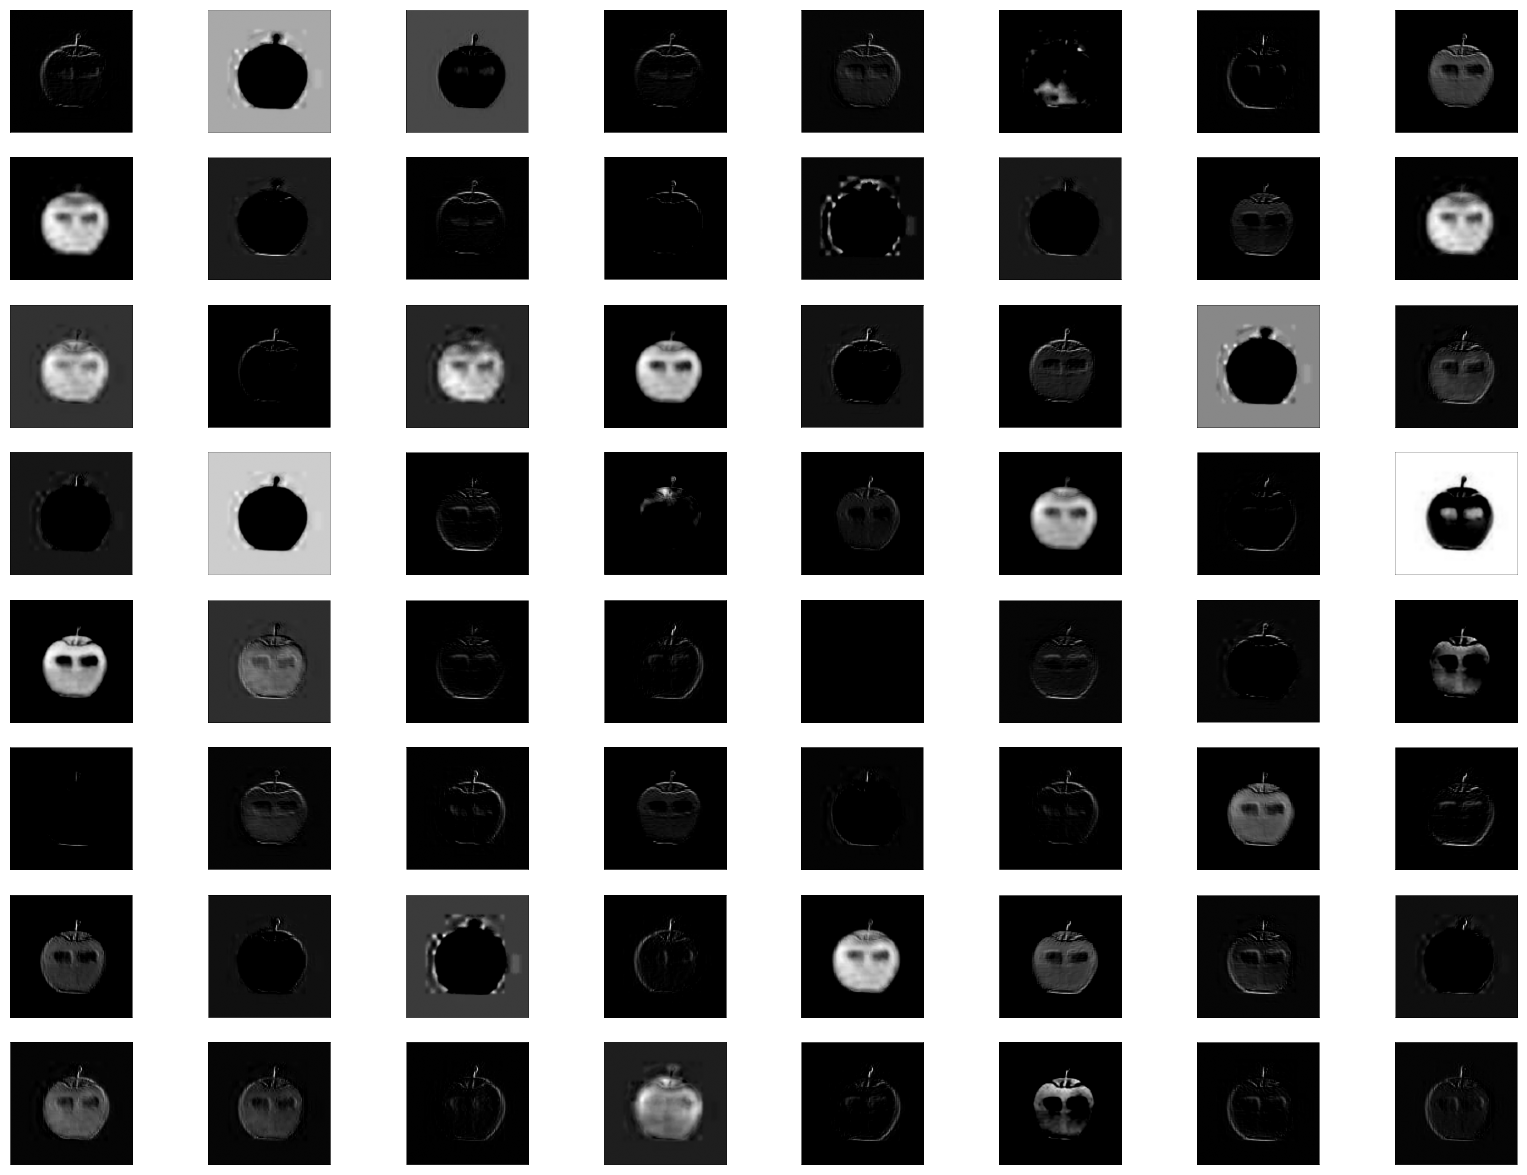

In [75]:
#just  for first layer 
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Calculate feature maps
features = model.predict(image)

# Create a figure
fig = plt.figure(figsize=(20, 15))

# Loop through all feature maps (channels)
for i in range(1, features.shape[3] + 1):
    plt.subplot(8, 8, i)
    plt.imshow(features[0, :, :, i-1], cmap='gray')
    plt.axis('off')  # optional: hide axes

# Show the feature maps
plt.show()


In [76]:
model2 = VGG16()


In [79]:
layer_index = [2, 5, 9, 13 , 17]
outputs = [model2.layers[i].output for i in layer_index]
model3 = Model(inputs=model2.inputs, outputs=outputs)


In [80]:
# Predict feature maps for the selected layers
feature_maps = model3.predict(image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


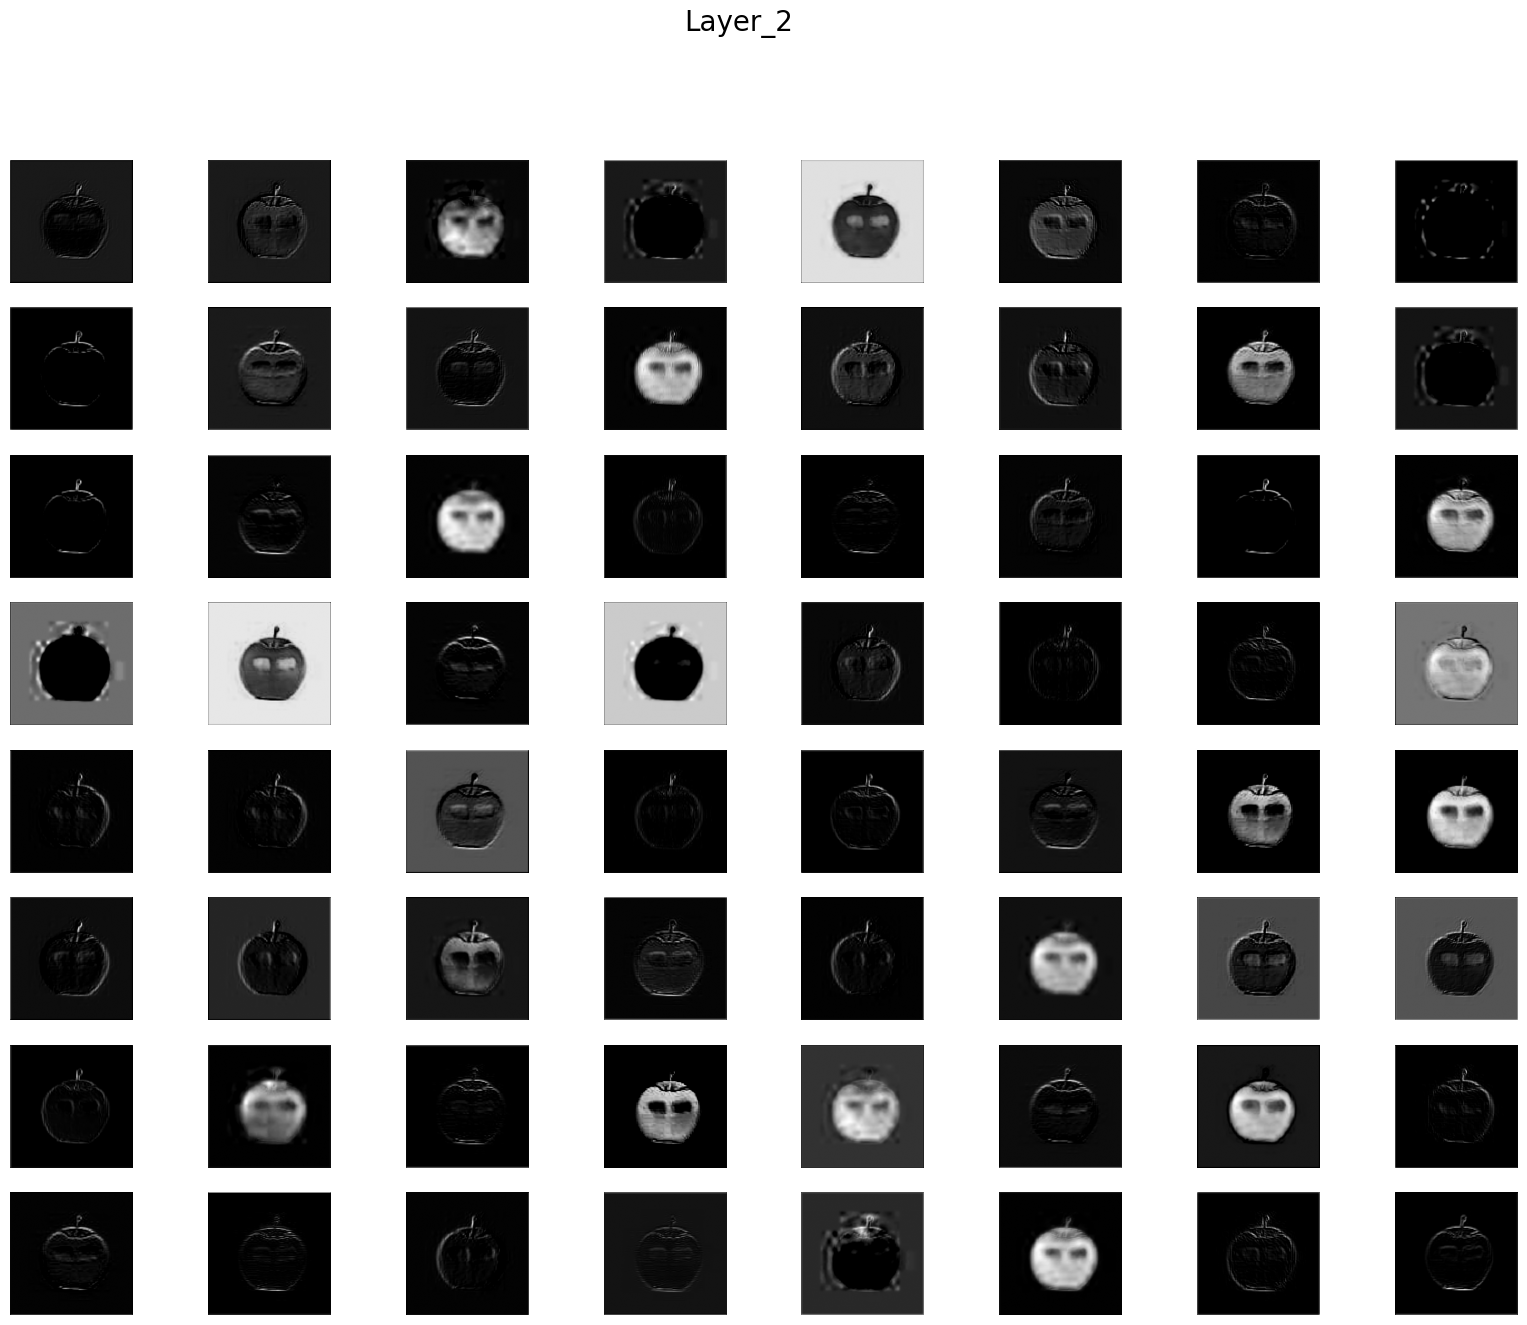

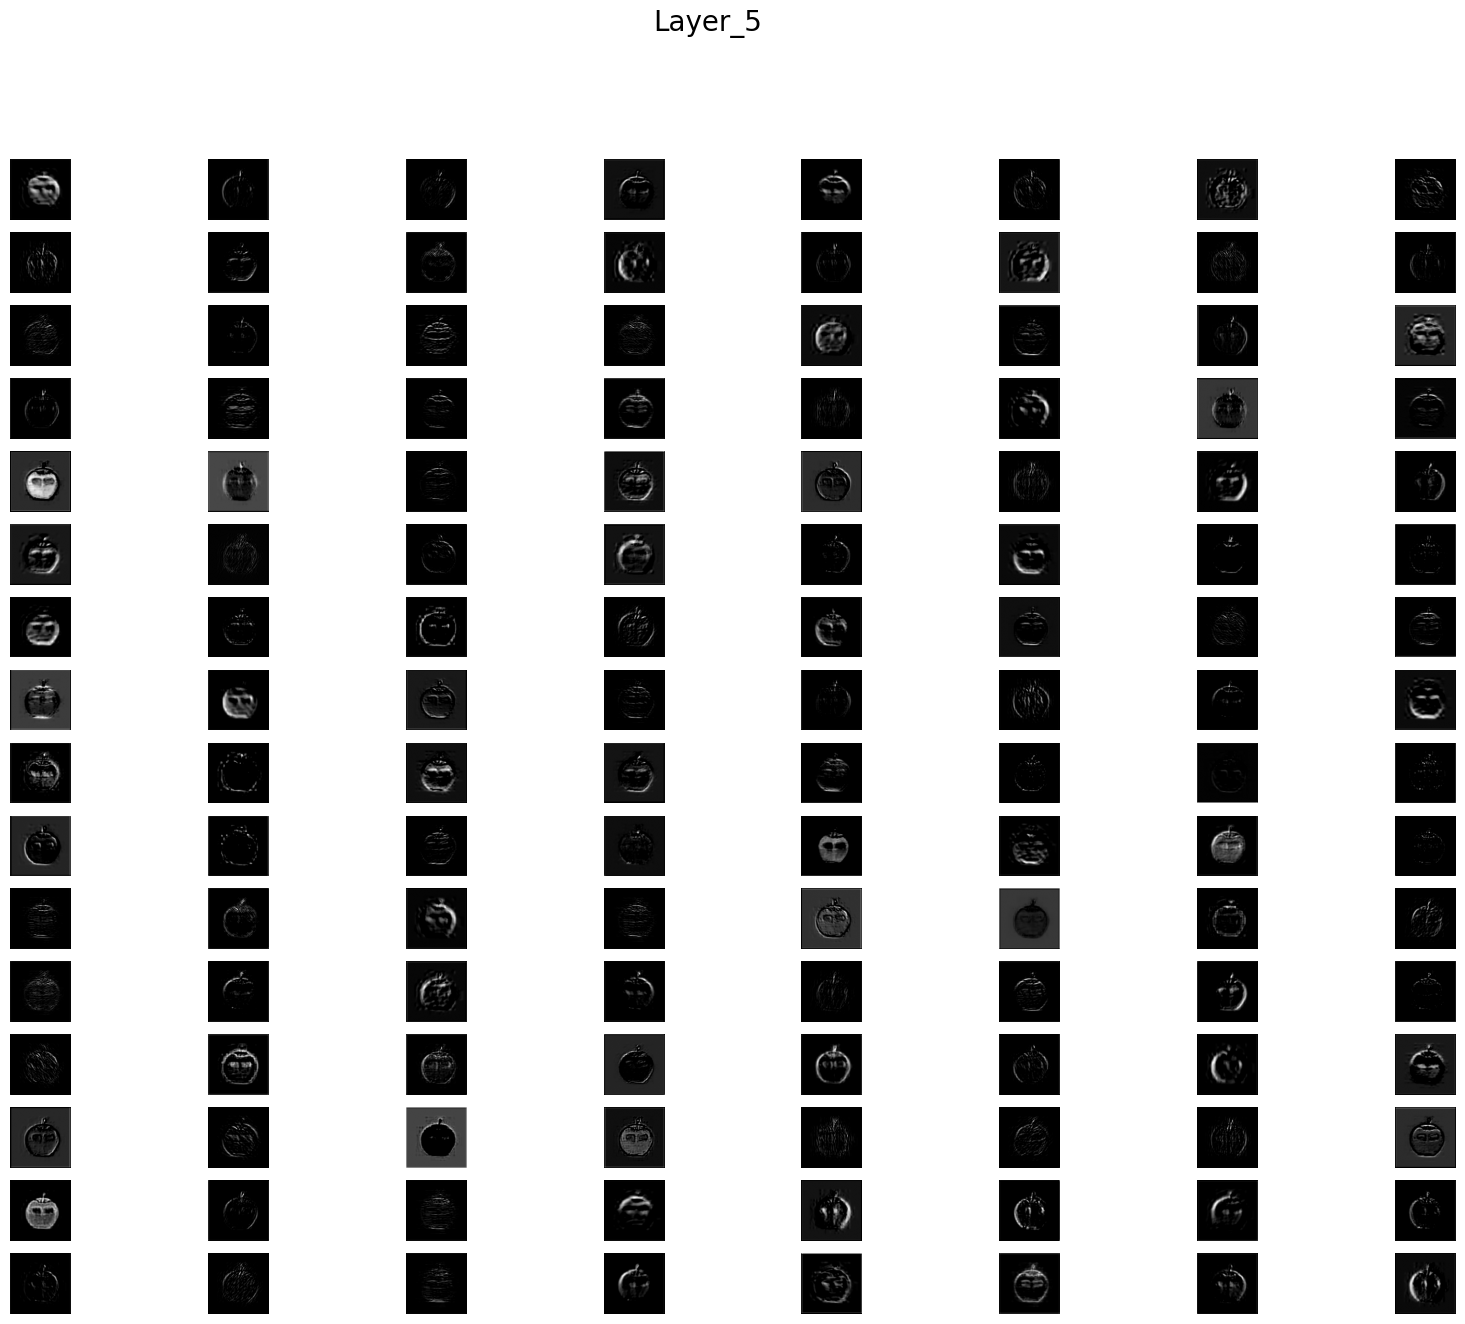

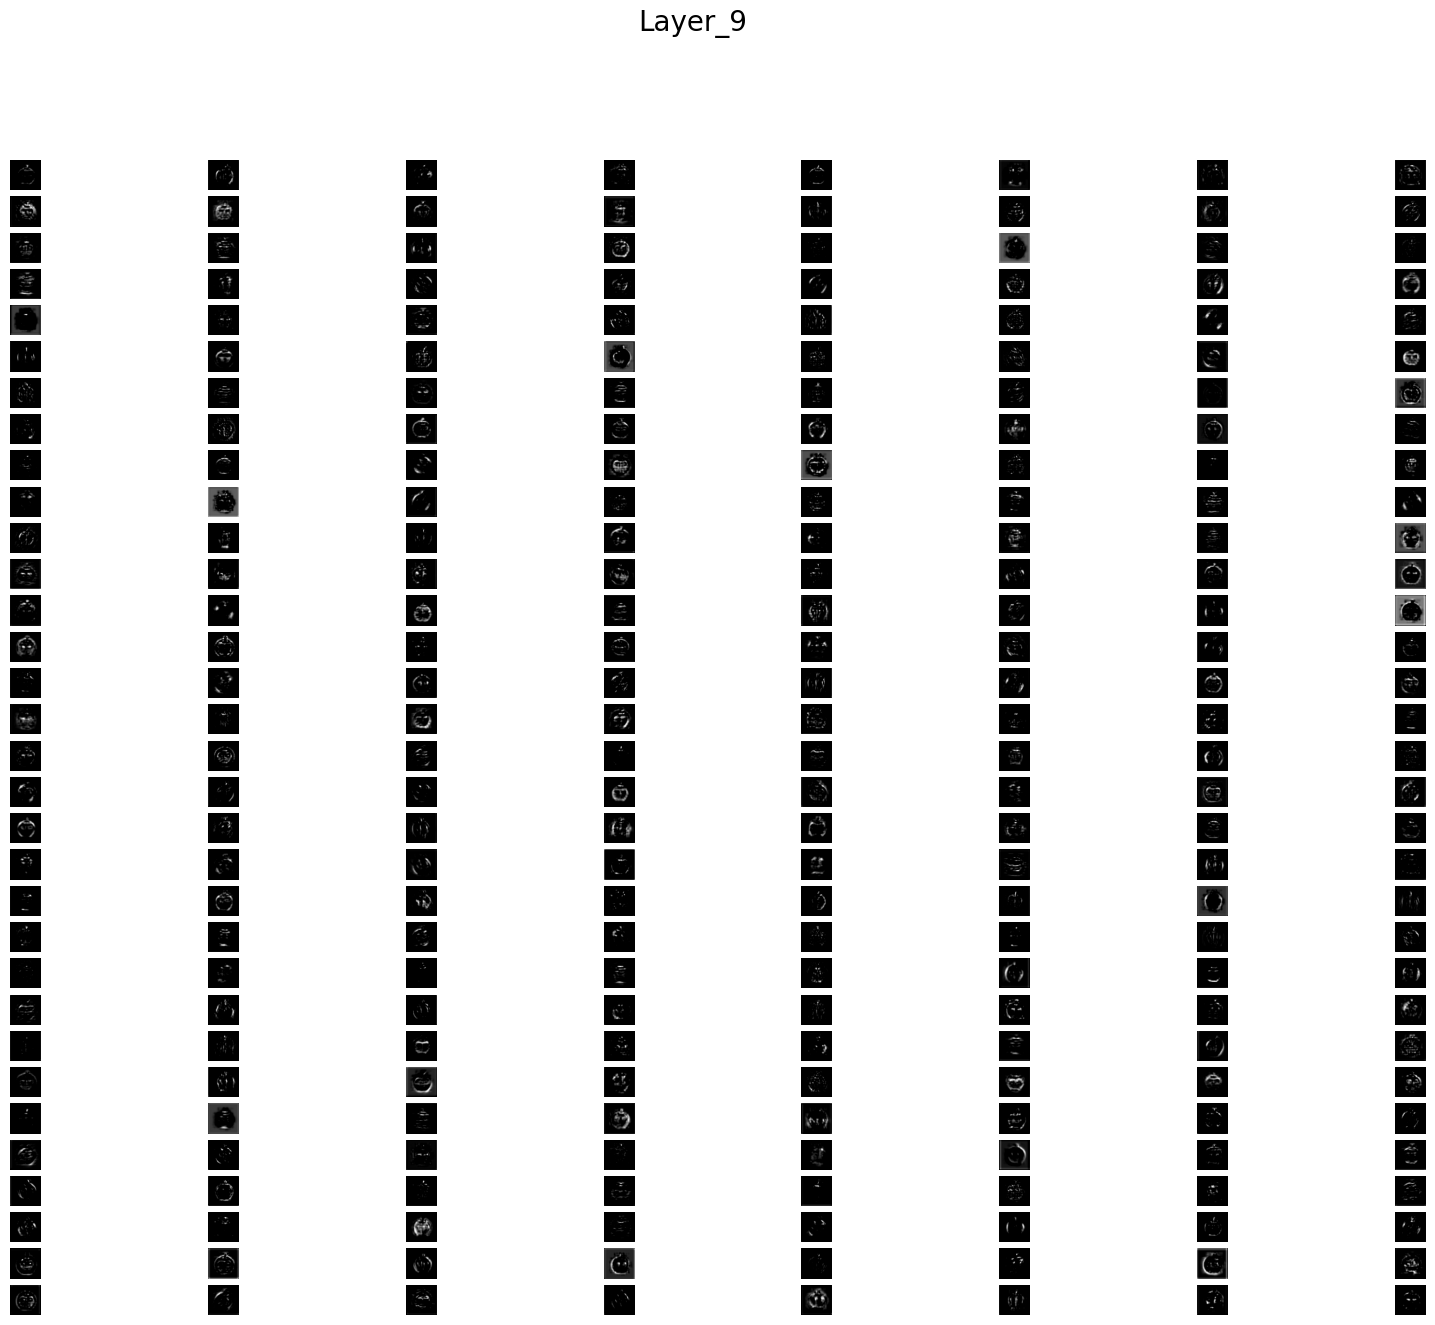

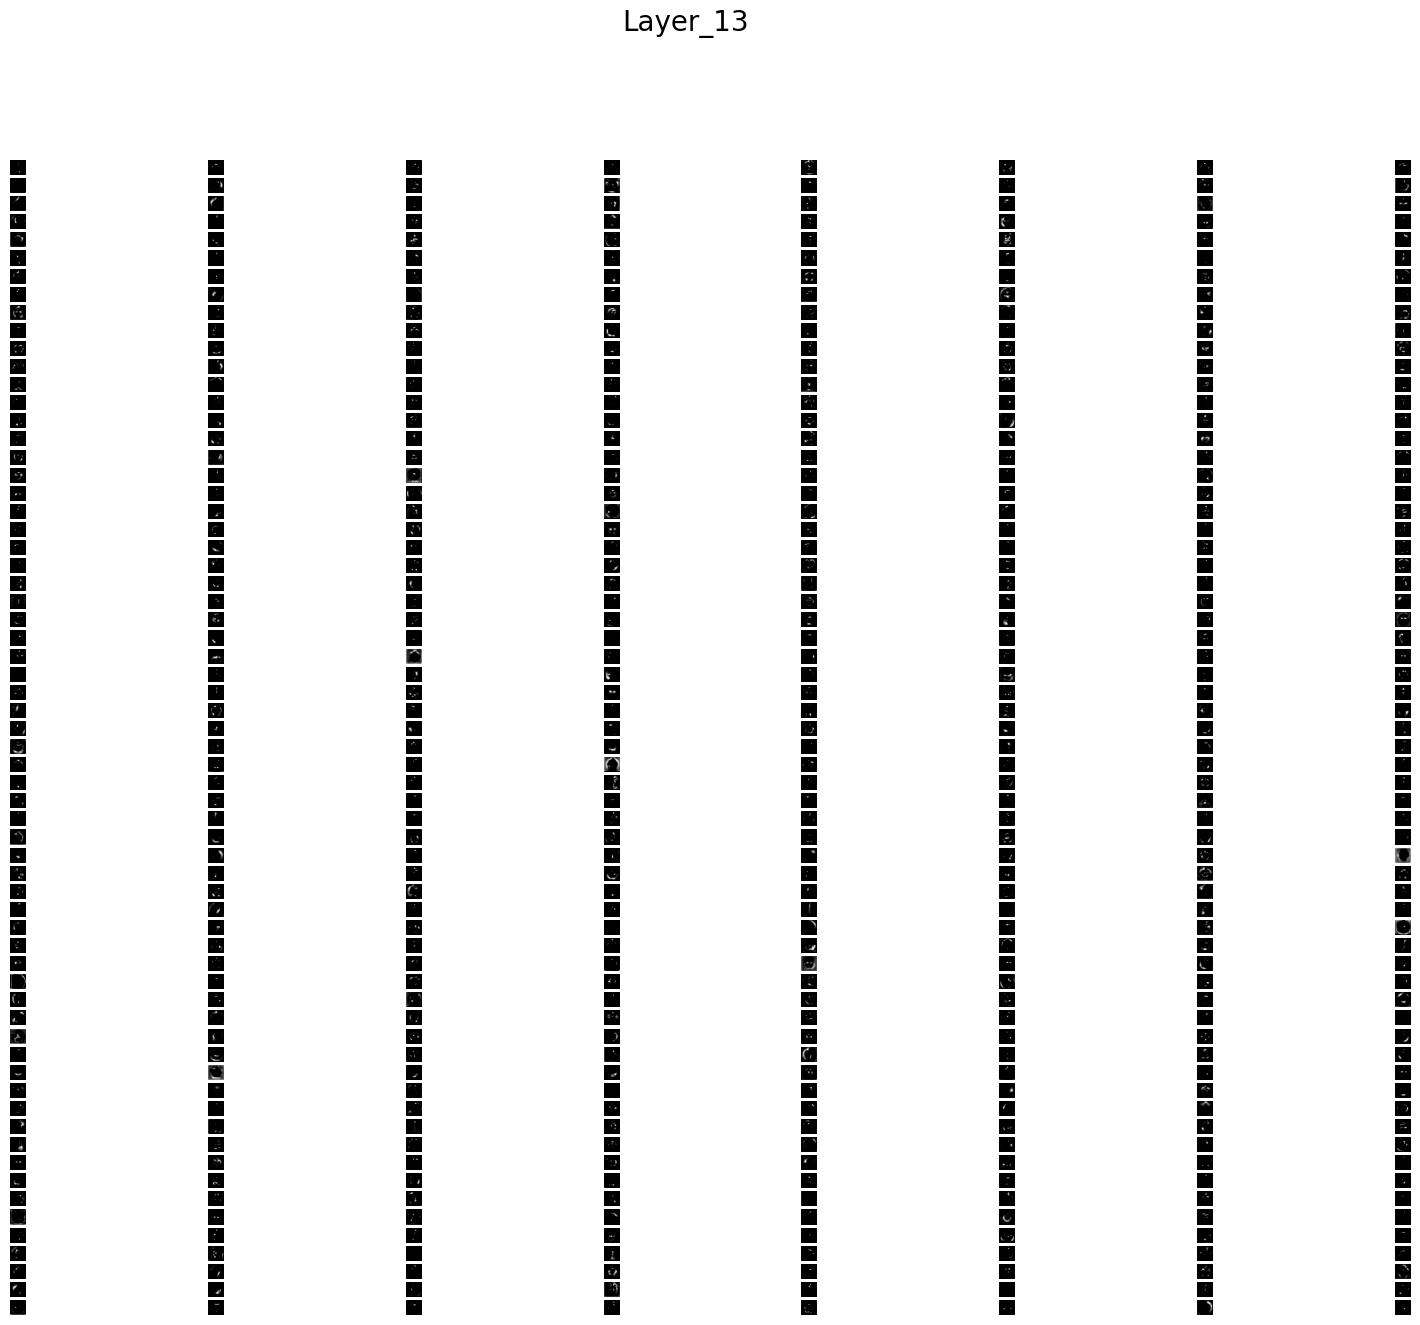

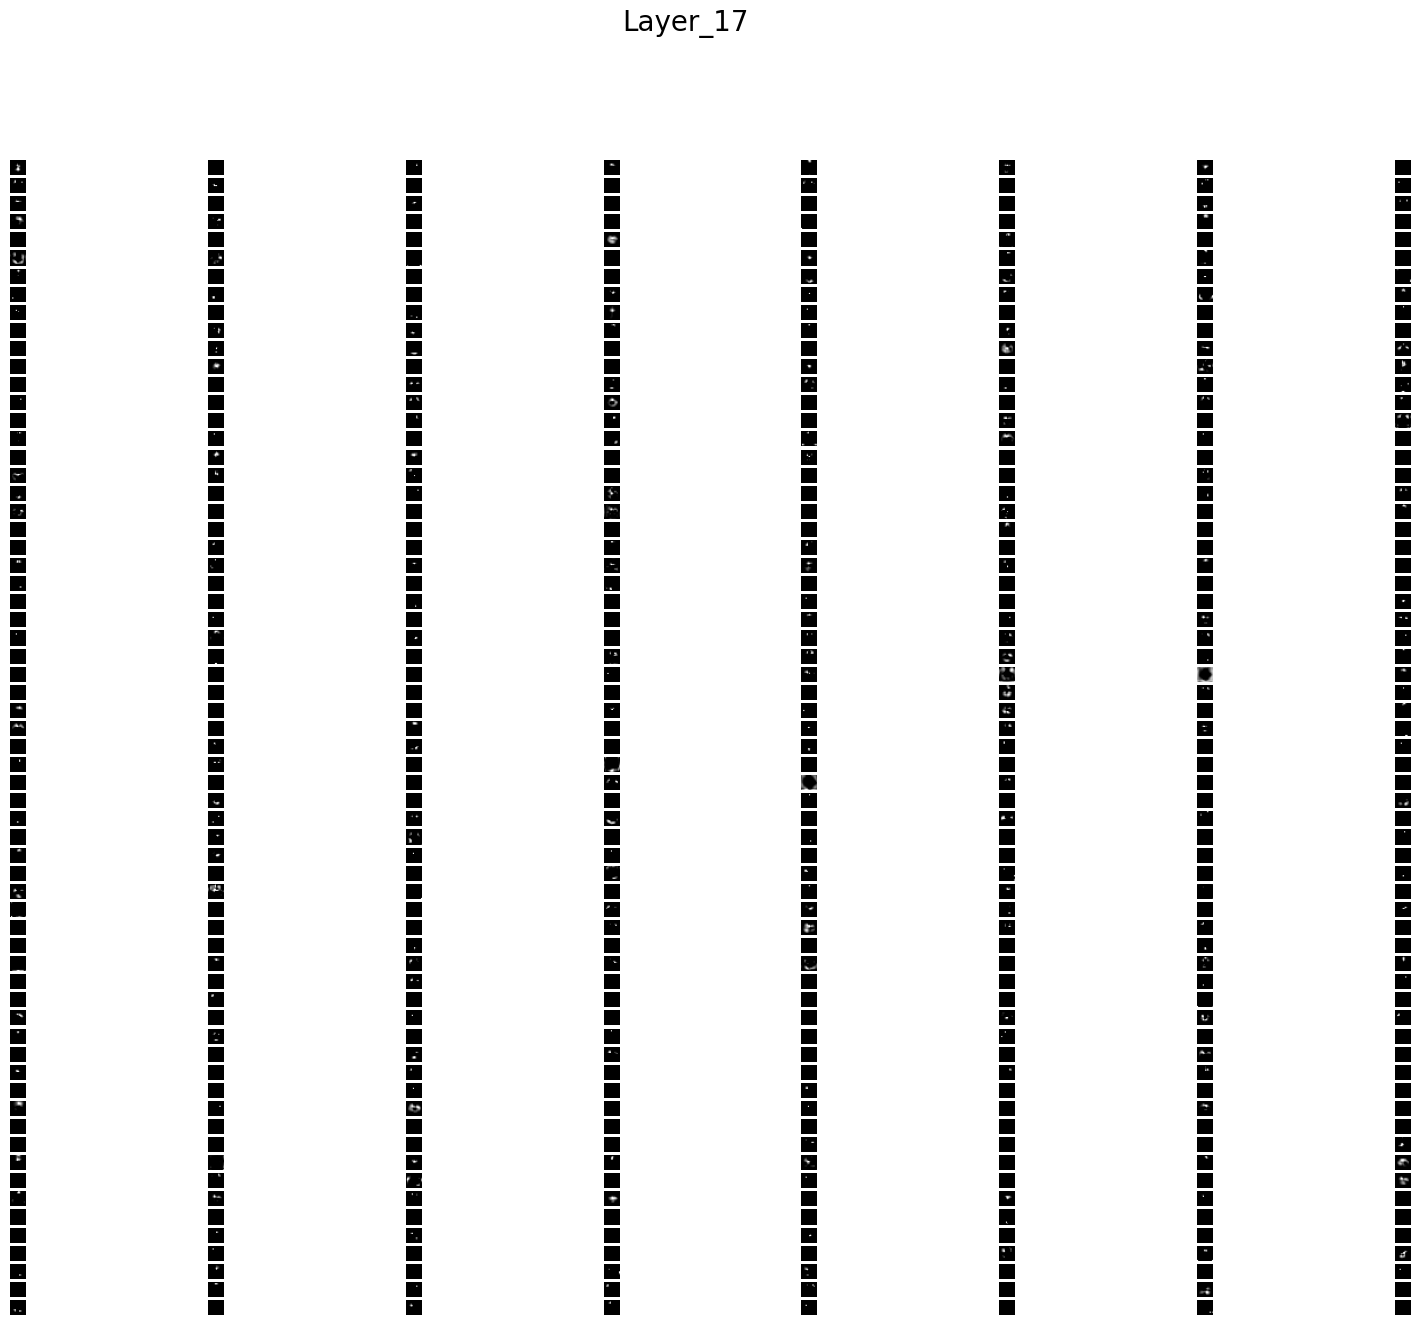

In [81]:
import matplotlib.pyplot as pyplot

for layer_idx, fmap in zip(layer_index, feature_maps):
    n_channels = fmap.shape[3]
    n_cols = 8
    n_rows = (n_channels + n_cols - 1) // n_cols
    
    fig = pyplot.figure(figsize=(20, 15))
    fig.suptitle(f"Layer_{layer_idx}", fontsize=20)
    
    for j in range(n_channels):
        pyplot.subplot(n_rows, n_cols, j+1)
        pyplot.imshow(fmap[0, :, :, j], cmap='gray')
        pyplot.axis('off')
    
    pyplot.show()
